# Recognizing hand-written digits

This example shows how scikit-learn can be used to recognize images of hand-written digits, from 0-9.

In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt


## the dataset

The digits dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image.

In [5]:
digits = load_digits()
n_samples = len(digits.images)
print("Number_of-examples = ", n_samples)

Number_of-examples =  1797


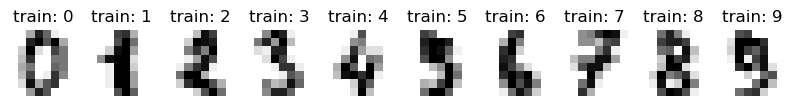

In [8]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("train: %i" % label)


 target sample: 5


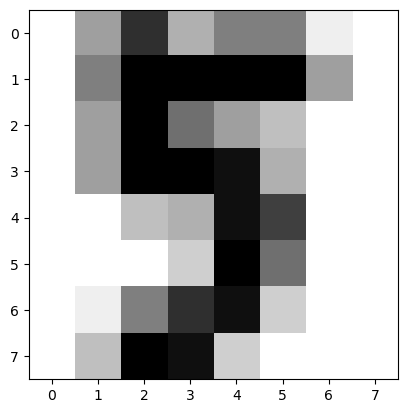

In [11]:
ex=33

print(f"\n target sample: {digits.target[ex]}")
plt.gray() 
plt.imshow(digits.images[ex], cmap=plt.cm.gray_r, interpolation="nearest") 
plt.show()


## classification

### preparing data

To apply a classifier on this data, we need to flatten the images, turning each 2-D array of grayscale values from shape (8, 8) into shape (64,). Subsequently, the entire dataset will be of shape (n_samples, n_features), where n_samples is the number of images and n_features is the total number of pixels in each image.

We can then split the data into train and test subsets and fit a support vector classifier on the train samples. The fitted classifier can subsequently be used to predict the value of the digit for the samples in the test subset

In [12]:
# Flatten the images, to turn data in a (samples, feature) matrix:
data = digits.images.reshape((n_samples, -1))

In [13]:
X = data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [14]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [16]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

### training the MLP

In [17]:
clf = MLPClassifier(hidden_layer_sizes=(10, ), activation='tanh', solver='sgd', 
                    alpha=0.00001, batch_size=4, learning_rate='constant', learning_rate_init=0.01, 
                    power_t=0.5, max_iter=9, shuffle=True, random_state=11, tol=0.00001, 
                    verbose=True, warm_start=False, momentum=0.8, nesterovs_momentum=True, 
                    early_stopping=False, validation_fraction=0.1, 
                    beta_1=0.9, beta_2=0.999, epsilon=1e-08)
print(clf)

MLPClassifier(activation='tanh', alpha=1e-05, batch_size=4,
              hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=9,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              verbose=True)


In [18]:
# Train the MLP classifier on training dataset
clf.fit(X_train, y_train)

Iteration 1, loss = 1.51573280
Iteration 2, loss = 1.18831476
Iteration 3, loss = 1.35012499
Iteration 4, loss = 1.08836525
Iteration 5, loss = 0.96398966
Iteration 6, loss = 0.90449698
Iteration 7, loss = 0.84175797
Iteration 8, loss = 0.84189612
Iteration 9, loss = 0.72202460


C:\Users\utente\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (9) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', alpha=1e-05, batch_size=4,
              hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=9,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              verbose=True)

In [19]:
# Evaluate acuracy on test data
score = clf.score(X_test,y_test)
print("Acuracy (on test set) = ", score)
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

Acuracy (on test set) =  0.7664071190211346
              precision    recall  f1-score   support

           0       1.00      0.68      0.81        94
           1       0.68      0.93      0.79        84
           2       0.98      0.62      0.76        87
           3       0.59      0.91      0.72        97
           4       0.98      0.90      0.94        97
           5       0.84      0.80      0.82        95
           6       0.78      0.94      0.85        80
           7       0.92      0.98      0.95        93
           8       0.54      0.09      0.15        81
           9       0.53      0.76      0.63        91

    accuracy                           0.77       899
   macro avg       0.78      0.76      0.74       899
weighted avg       0.79      0.77      0.75       899



In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_true, y_pred, normalize='pred')

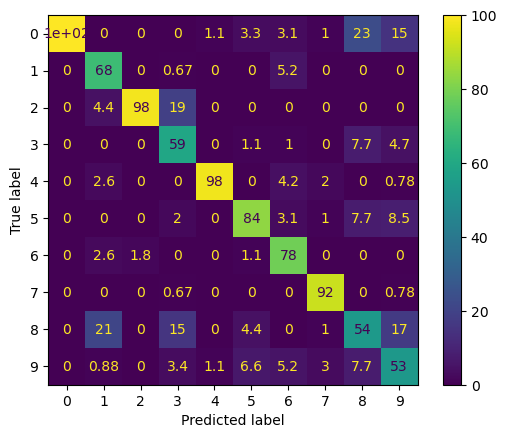

In [21]:
cm_display = ConfusionMatrixDisplay(cm*100).plot()

### making a prediction

In [27]:
y_true, y_pred = y_test, clf.predict(X_test)


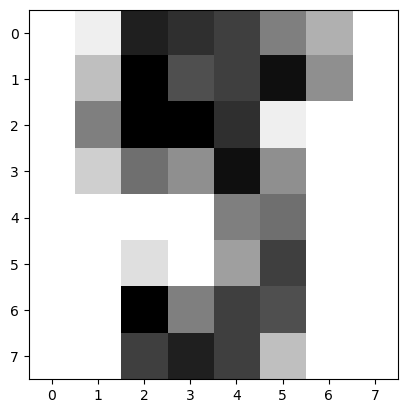


 target number: 5

 predicted number: 8


In [34]:
sample=55

plt.gray() 
plt.imshow(X_test[sample].reshape((8, 8)), cmap=plt.cm.gray_r, interpolation="nearest") 
plt.show()

print(f"\n target number: {y_true[sample]}")
print(f"\n predicted number: {y_pred[sample]}")



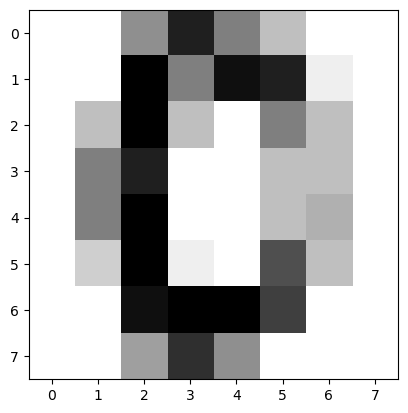


 target number: 0

 predicted number: 0


In [35]:
sample=54

plt.gray() 
plt.imshow(X_test[sample].reshape((8, 8)), cmap=plt.cm.gray_r, interpolation="nearest") 
plt.show()

print(f"\n target number: {y_true[sample]}")

print(f"\n predicted number: {y_pred[sample]}")

